## Importing Necessary Libraries

In [3]:
#For data analysis and numerical functions
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset loading

In [5]:
df=pd.read_csv("data_housing.csv")

In [6]:
df.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  Price  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6

## Understanding the data 

### Problem statement:
Train a linear legression model to predict the price of the house using given information

MLR Problem(Multi linear regression)

In [7]:
#:Attribute Information (in order): 
    # - CRIM per capita crime rate by town 
    # - ZN proportion of residential land zoned for lots over 25,000 sq ft. 
    # - INDUS proportion of non-retail(factories,outlets) business acres per town 
    # - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    # - NOX nitric oxides concentration (parts per 10 million) (pollution)
    # - RM average number of rooms per dwelling 
    # - AGE proportion of owner-occupied units built before 1940 
    # - DIS weighted distances to five Boston employment centres 
    # - RAD index of accessibility to radial highways 
    # - TAX full-value property tax rate per $10,000 
    # - PTRATIO pupil-teacher ratio by town 
    # - B 1000(Bk - 0.63)^2, where Bk is the proportion of black people by town 
    # - LSTAT  % lower status of the population

## Missing Values

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [10]:
# There are no missing values , but if there would have been any missing values
# We need to impute or process them like we did or studied in EDA

## EDA

In [11]:
# EDA is an integral part of any data analysis or ML problem

In [12]:
cat_cols=['RAD','CHAS']
num_cols=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','Price']

## Univariate Analysis

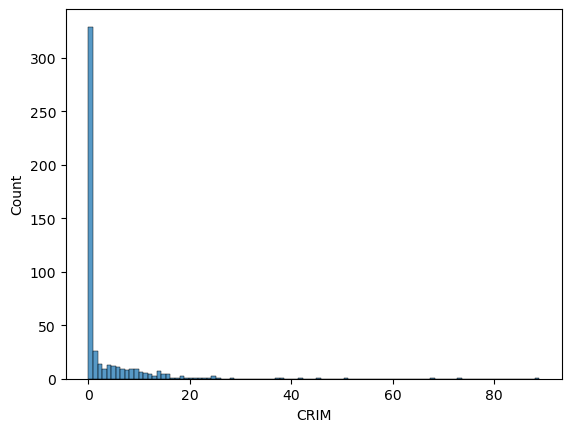

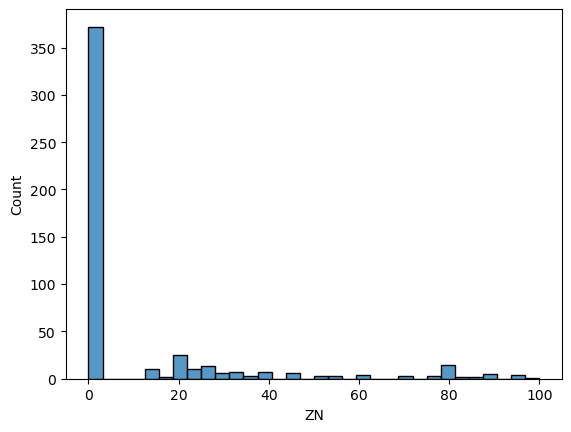

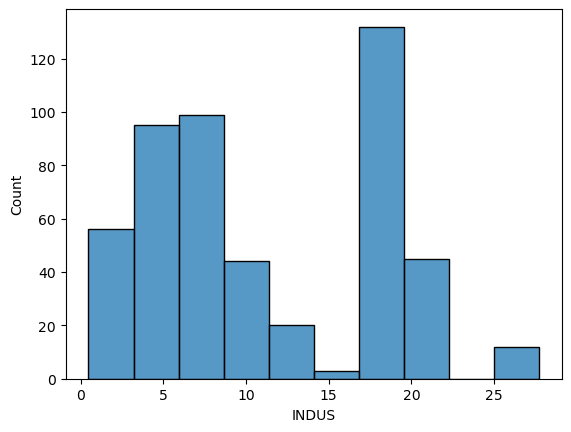

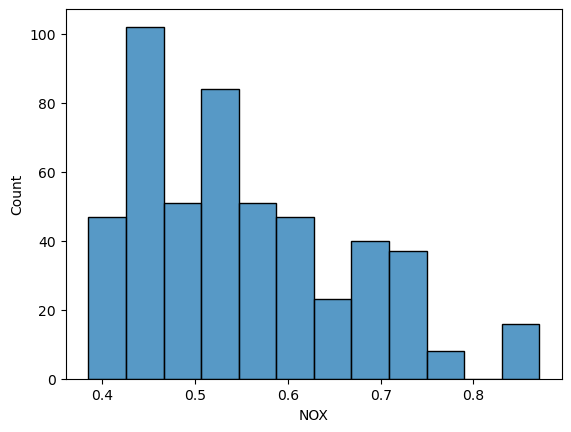

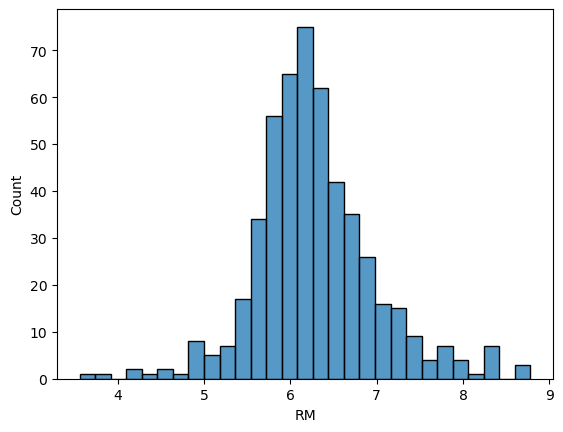

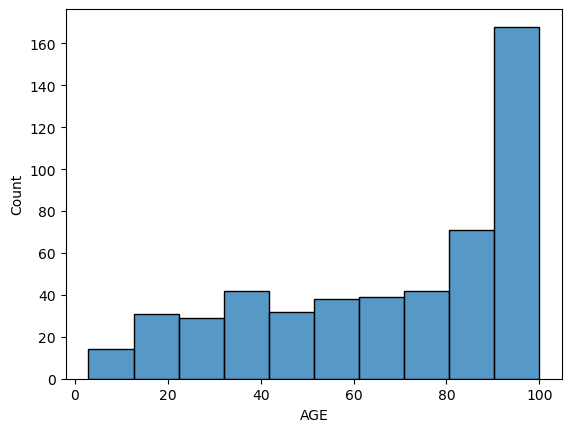

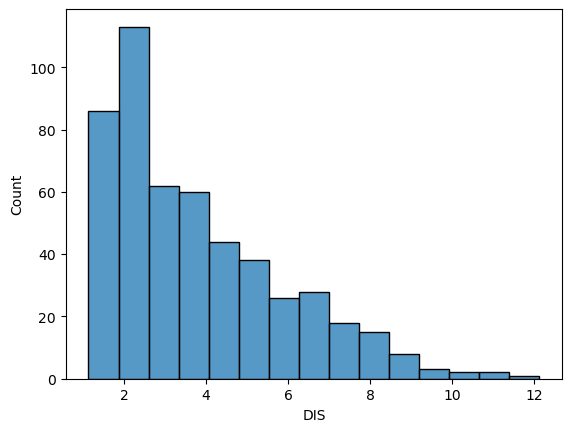

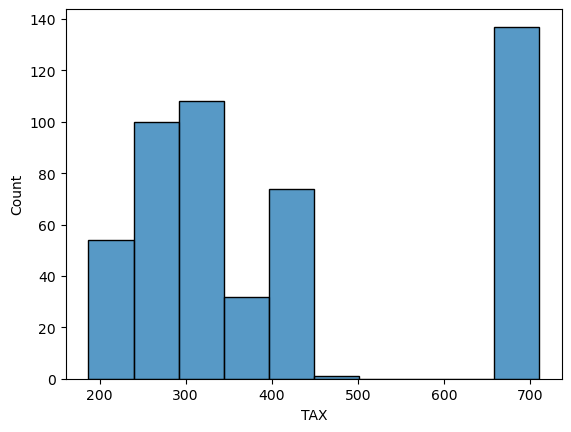

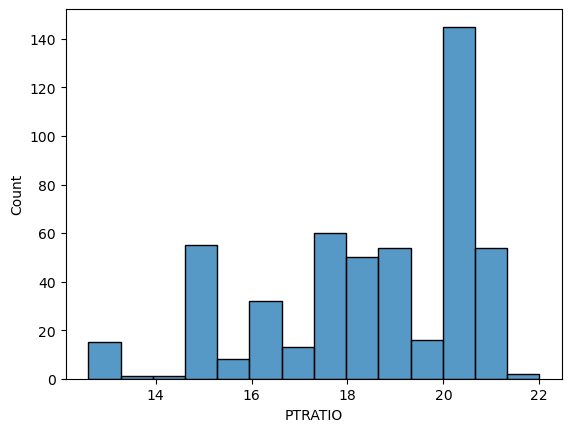

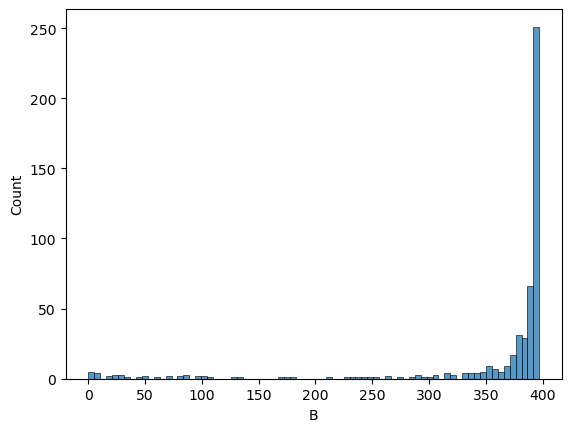

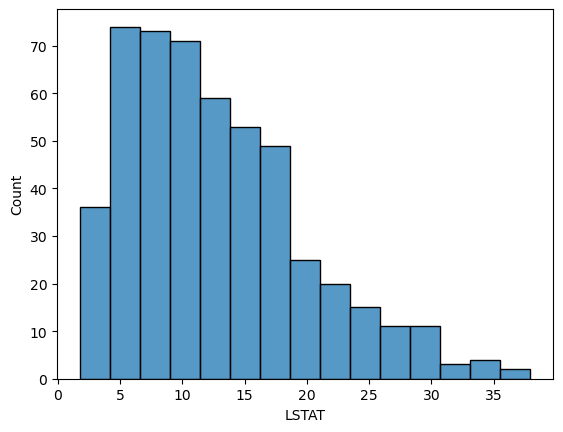

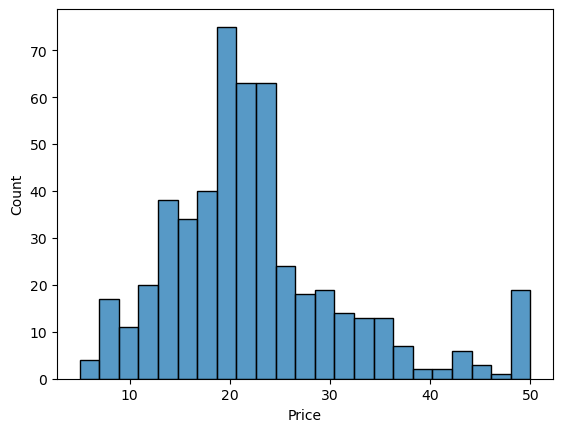

In [13]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

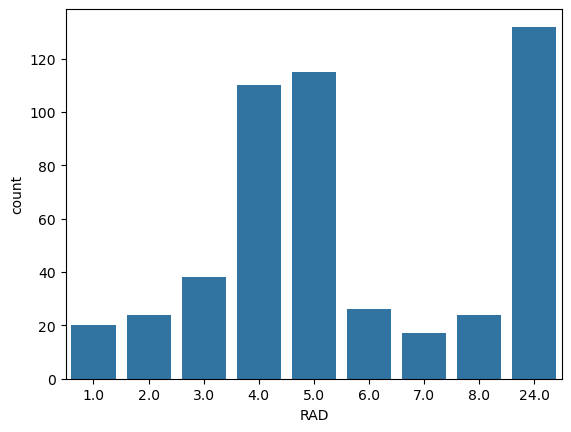

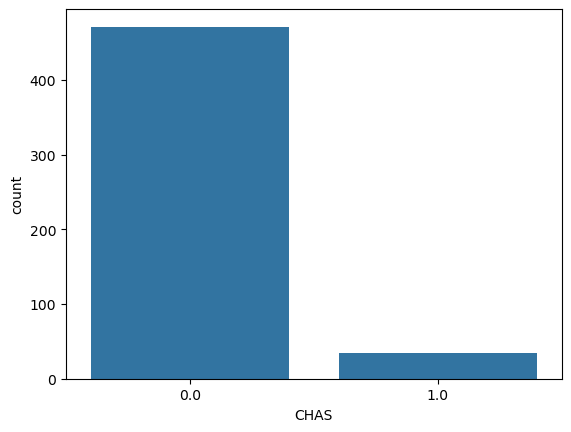

In [14]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis

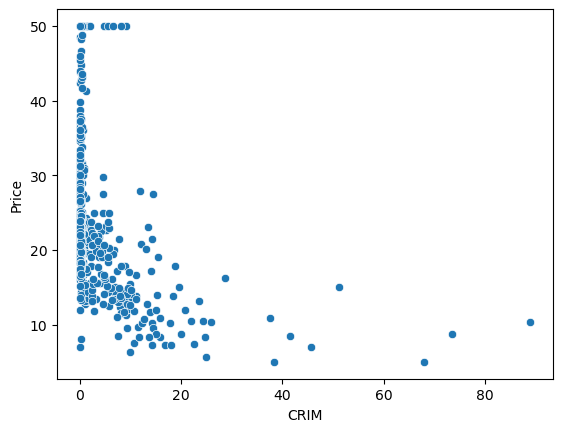

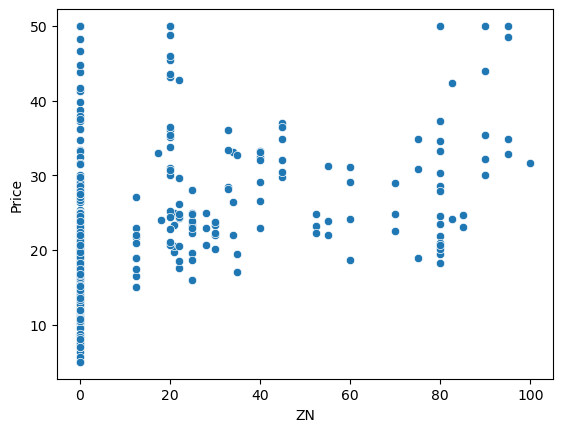

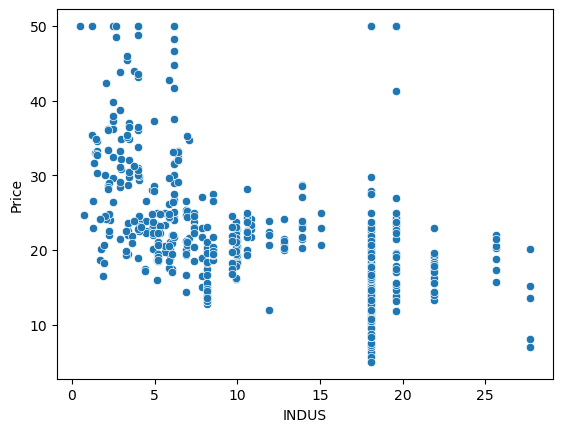

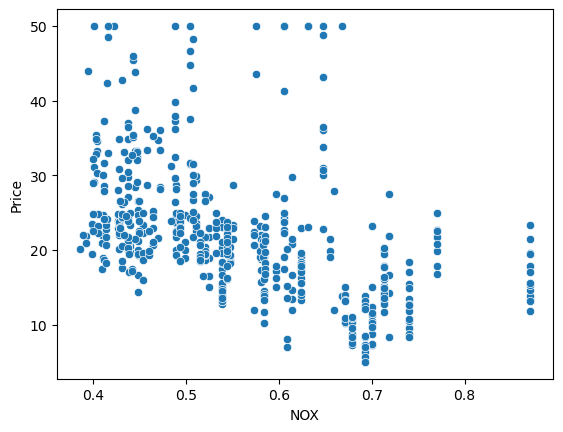

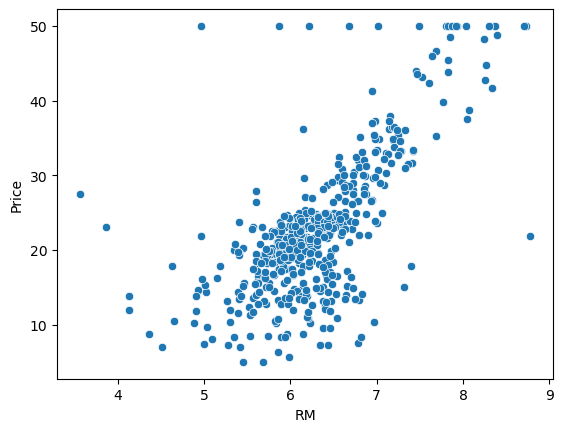

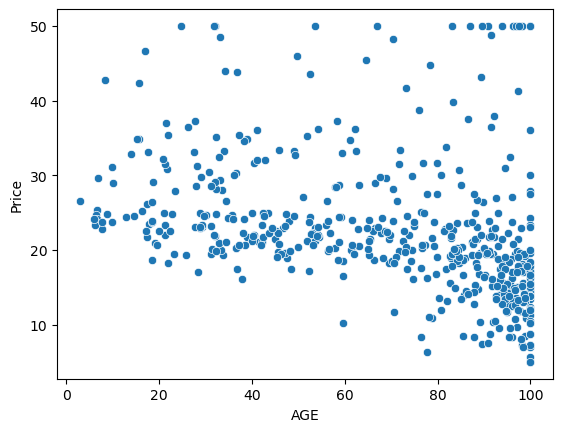

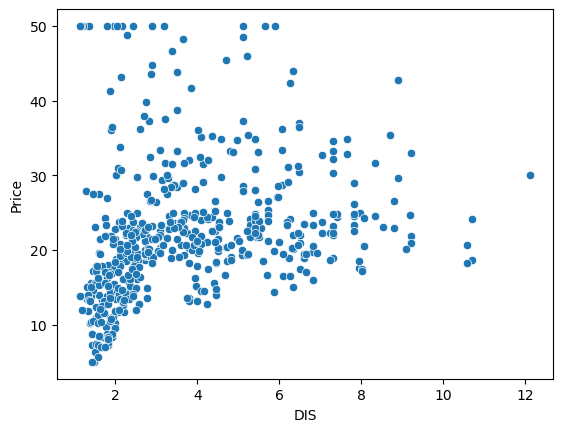

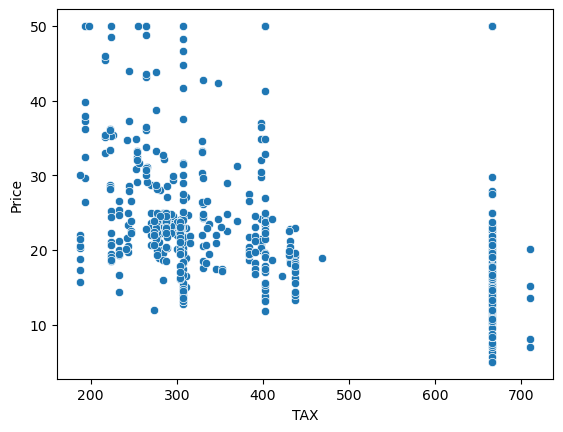

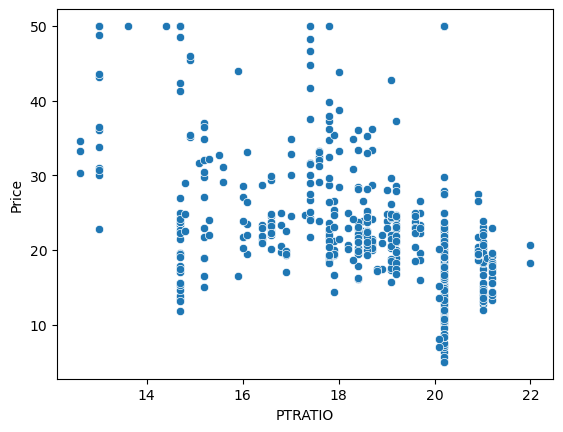

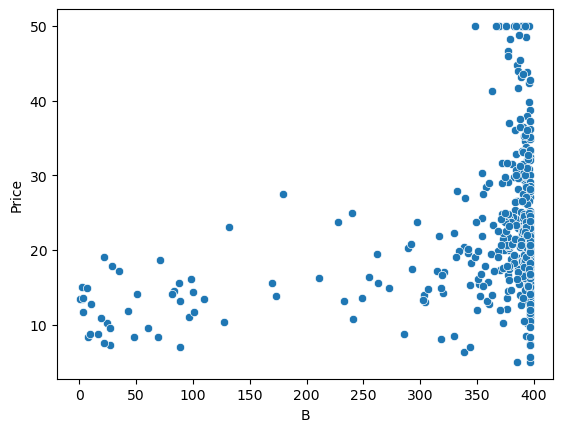

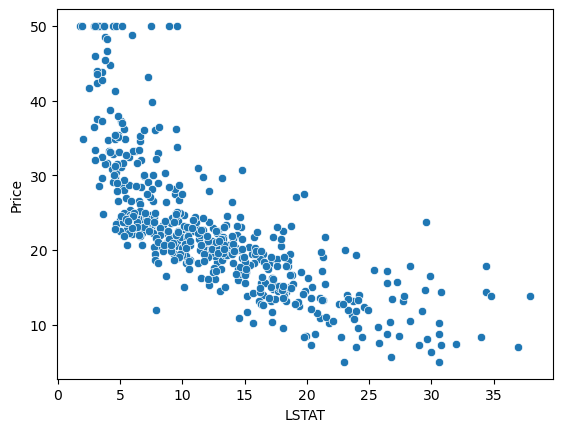

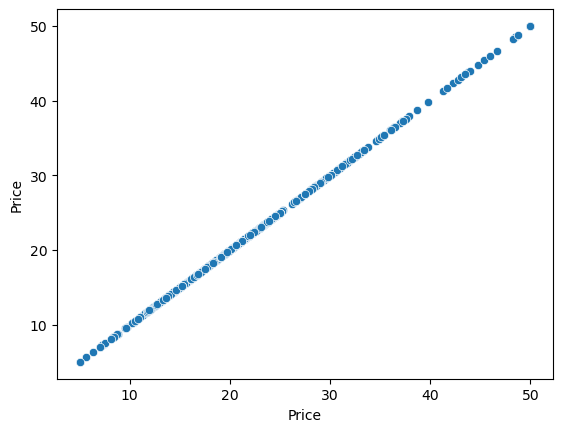

In [15]:
for i in num_cols:
    sns.scatterplot(x=df[i],y=df["Price"])
    plt.show()

## Multivariate Analysis

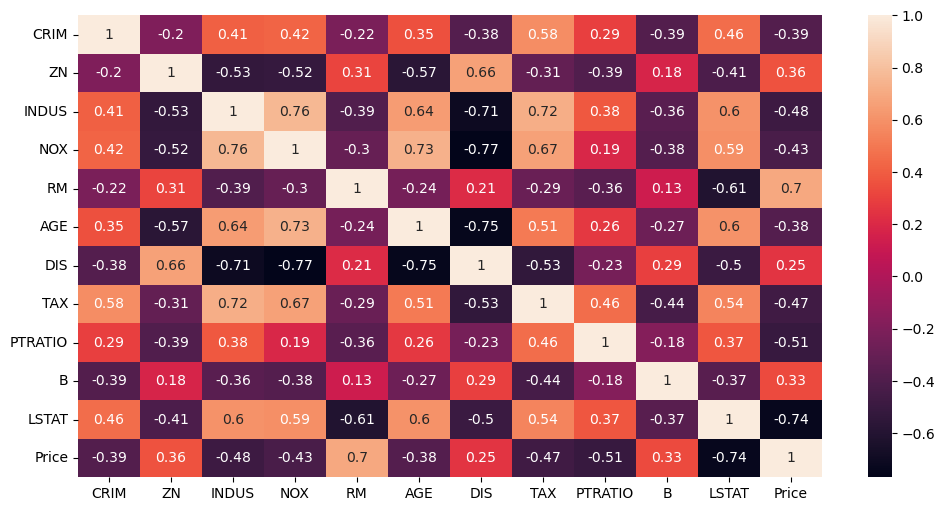

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

## Pre-processing Steps
#### Dummy Variable creation -One hot Encoding

In [ ]:
# Wherever we have more than 2 categories we need to create dummies for them

In [17]:
df[cat_cols].nunique()

RAD     9
CHAS    2
dtype: int64

In [19]:
#Number of dummies =n-1
df1=pd.get_dummies(df,columns=['RAD'],drop_first=True, dtype=int)

In [20]:
df1.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296.0     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242.0     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242.0     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222.0     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222.0     18.7   

   ...  LSTAT  Price  RAD_2.0  RAD_3.0  RAD_4.0  RAD_5.0  RAD_6.0  RAD_7.0  \
0  ...   4.98   24.0        0        0        0        0        0        0   
1  ...   9.14   21.6        1        0        0        0        0        0   
2  ...   4.03   34.7        1        0        0        0        0        0   
3  ...   2.94   33.4        0        1        0        0        0        0   
4  ...   5.33   36.2        0        1        0        0        0        0   

   RAD_8.0  RAD_24.0  
0        0         0  
1        0         0  
2        0         0  
3        0         0  
4        0         0  

[5 rows x 21 columns]

In [23]:
df1.shape

(506, 21)

In [24]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0',
       'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0'],
      dtype='object')

### Train-Test Split

In [25]:
X=df1.drop(["Price"],axis=1)
y=df1["Price"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [32]:
X_train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS    TAX  PTRATIO  \
379  17.86670   0.0  18.10   0.0  0.671  6.223  100.0  1.3861  666.0     20.2   
311   0.79041   0.0   9.90   0.0  0.544  6.122   52.8  2.6403  304.0     18.4   
157   1.22358   0.0  19.58   0.0  0.605  6.943   97.4  1.8773  403.0     14.7   
244   0.20608  22.0   5.86   0.0  0.431  5.593   76.5  7.9549  330.0     19.1   
56    0.02055  85.0   0.74   0.0  0.410  6.383   35.7  9.1876  313.0     17.3   

          B  LSTAT  RAD_2.0  RAD_3.0  RAD_4.0  RAD_5.0  RAD_6.0  RAD_7.0  \
379  393.74  21.78        0        0        0        0        0        0   
311  396.90   5.98        0        0        1        0        0        0   
157  363.43   4.59        0        0        0        1        0        0   
244  372.49  12.50        0        0        0        0        0        1   
56   396.90   5.77        1        0        0        0        0        0   

     RAD_8.0  RAD_24.0  
379        0         1  
311        0         0  
157        0         0  
244        0         0  
56         0         0

In [27]:
print(X_train.shape)
print(X_test.shape)

(404, 20)
(102, 20)


### Scaling
#### Standard scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # As test data is unseen data we can't fit on it

In [35]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [36]:
X_train.head(2)

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.892434 -0.495778  1.035280 -0.288288  1.019549 -0.074765  1.128863   
1 -0.327672 -0.495778 -0.161802 -0.288288 -0.077387 -0.218185 -0.552953   

        DIS       TAX   PTRATIO         B     LSTAT   RAD_2.0   RAD_3.0  \
0 -1.175156  1.543468  0.813975  0.387891  1.262678 -0.203069 -0.293294   
1 -0.561852 -0.600514 -0.039554  0.424998 -0.910043 -0.203069 -0.293294   

    RAD_4.0   RAD_5.0   RAD_6.0   RAD_7.0  RAD_8.0  RAD_24.0  
0 -0.535373 -0.543021 -0.239983 -0.196368 -0.22215  1.709482  
1  1.867857 -0.543021 -0.239983 -0.196368 -0.22215 -0.584972

### Feature Selection

In [37]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

In [39]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=8) #8-20

In [40]:
selector=selector.fit(X_train,y_train)
selector.support_

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True])

In [42]:
selected_features=X_train.columns[selector.support_]
print(selected_features)

Index(['ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'RAD_24.0'], dtype='object')


In [43]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [44]:
print(X_train.shape)
print(X_test.shape)

(404, 8)
(102, 8)


### Modelling

In [46]:
import statsmodels.api as sm

In [ ]:
X_train